<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Python_0518_opencv_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

file1 = files.upload()

Saving flower.jpg to flower.jpg


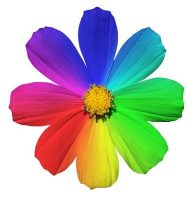

In [2]:
img1 = cv2.imread("flower.jpg")
height, width, channel = img1.shape
img2 = cv2.resize(img1, (height//2, width//2))
cv2_imshow(img2)

In [ ]:
def rgbToGray(_img, mode='d', _list=None):

  import cv2
  import numpy as np

  d_list = [1, 0, 0]
  
  h, w, c = _img.shape
  gray_img = np.zeros(shape=(h, w, 1), dtype=np.uint8)

  if mode == 'd':
    for y in range(h):
      for x in range(w):
        gray_img[y][x] = ((_img[y][x][0].astype(np.uint16) + _img[y][x][1].astype(np.uint16) + _img[y][x][2].astype(np.uint16))/3).astype(np.uint8)
    cv2_imshow(gray_img)
  
  else:
    if mode == 's':
      d_list = _list
    elif mode == 'r':
      d_list = [0, 0, 1]
    elif mode == 'g':
      d_list = [0, 1, 0]
    elif mode == 'b':
      d_list = [1, 0, 0]

    for y in range(h):
      for x in range(w):
        gray_img[y][x] = (_img[y][x][0]*d_list[0]+_img[y][x][1]*d_list[1]+_img[y][x][2]*d_list[2])
    cv2_imshow(gray_img)

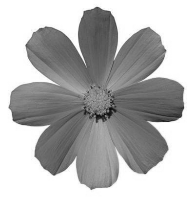

In [ ]:
rgbToGray(img2)

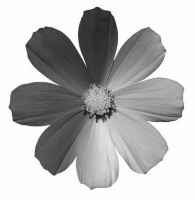

In [ ]:
list1 = [0.0722, 0.7152, 0.2126]
rgbToGray(img2, mode='s', _list=list1)

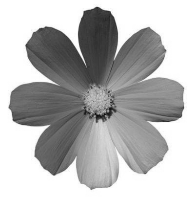

In [ ]:
list2 = [0.114, 0.587, 0.299]
rgbToGray(img2, mode='s', _list=list2)

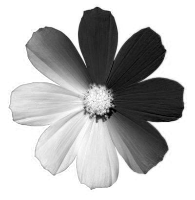

In [ ]:
rgbToGray(img2, mode='r')

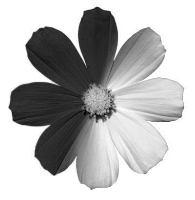

In [ ]:
rgbToGray(img2, mode='g')

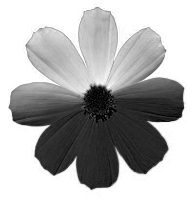

In [ ]:
rgbToGray(img2, mode='b')

#### __변환 공식 참고 사이트:__ https://www.rapidtables.org/ko/convert/color/rgb-to-hsv.html


In [20]:
def rgbToHSV(_img):
  height, width, channel = _img.shape
  hsv_img = np.zeros(shape=(height, width, channel), dtype=np.uint8)

  for y in range(height):
    for x in range(width):
      r = _img[y][x][2]/255.0
      g = _img[y][x][1]/255.0
      b = _img[y][x][0]/255.0

      listRGB = [r, g, b]
      c_max = max(listRGB)
      c_min = min(listRGB)
      delta = c_max - c_min

      s = 0  
      if c_max != 0:
        s = delta/c_max

      h = 0
      if delta == 0:
        h = 0
      elif c_max == r:
        h = 60*(g-b)/delta
      elif c_max == g:
        h = 60*((b-r)/delta + 2)
      elif c_max ==b:
        h = 60*((r-g)/delta + 4)
      
      if h < 0 :
        h += 360  

      hsv_img[y][x][:]=[h/2, s*255, c_max*255] 

  cv2_imshow(hsv_img)

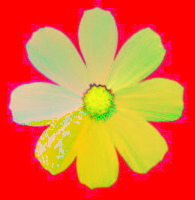

In [21]:
rgbToHSV(img2)

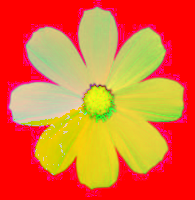

In [22]:
_img = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
cv2_imshow(_img)

In [23]:
def hsvToRGB(_img):
  _h, _w, _c = _img.shape
  rgb_img = np.zeros(shape=_img.shape, dtype="uint8")
  for _y in range(_h):
    for _x in range(_w):
      h = _img[_y, _x, 0]*2
      s = _img[_y, _x, 1]/255.0
      v = _img[_y, _x, 2]/255.0
      c = v*s
      x = c * (1-np.abs((h/60)%2-1))
      m = v-c
      listBRG=[0, 0, 0]
      if h <= h < 60:
        listBRG = [0, x, c]
      elif 60 <= h <120:
        listBRG = [0, c, x]
      elif 120 <= h <180:
        listBRG = [x, c, 0]    
      elif 180 <= h <240:
        listBRG = [c, x, 0]   
      elif 240 <= h <300:
        listBRG = [c, 0, x]
      else:
        listBRG = [x, 0, c]
      
      rgb_img[_y][_x] = np.round((listBRG+m)*255).astype(np.uint8)
  return rgb_img

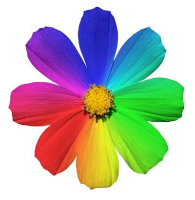

In [24]:
rgb_img = cv2.cvtColor(_img, cv2.COLOR_HSV2BGR)
cv2_imshow(rgb_img)

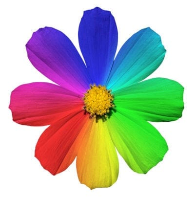

In [26]:
rgb_test = hsvToRGB(_img)
cv2_imshow(rgb_test)

In [27]:
def brightness(_img, _bar=0):
  _filter = np.full(shape=_img.shape, fill_value=_bar, dtype=np.int16)
  filtered_img = np.zeros(shape=_img.shape, dtype=np.int32)
  filtered_img = _img + _filter
  filtered_img = filtered_img.clip(0, 255)
  filtered_img = filtered_img.astype(np.uint8)
  return filtered_img

In [28]:
cont = brightness(img2, 50)

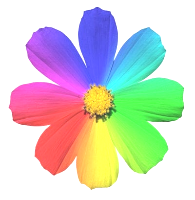

In [29]:
cv2_imshow(cont)

In [34]:
def contrast(_img, _bar=2.8):
  _img = _img.astype(np.float32)
  filtered_img = np.zeros(shape=_img.shape, dtype=np.float32)
  filtered_img = _img + ((_img-128) * _bar)
  filtered_img = filtered_img.clip(0, 255)
  filtered_img = filtered_img.astype(np.uint8)

  return filtered_img

In [36]:
cont = contrast(img2, 10)

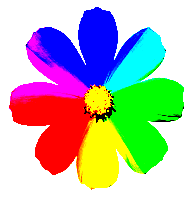

In [37]:
cv2_imshow(cont)